In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

### READING DATASET

In [2]:
admissions = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Optix_repo\DataCleaning\admissions.csv")
metrics = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Optix_repo\DataCleaning\daily_metrics.csv")
hospitals = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Optix_repo\DataCleaning\hospitals.csv")
wards = pd.read_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Optix_repo\DataCleaning\wards.csv")

In [3]:
list_data = [("admissions", admissions), ("metrics", metrics), ("hospitals", hospitals), ("wards", wards)]

for name, data in list_data:
    print(name)
    print(f"{round(data.isnull().mean() * 100, 2)}\n")

    print(data.duplicated().sum())

    print(data.describe())
    print(data.describe(include=("O", "category")))
    print("-"*100)

admissions
admission_id            0.00
date                    0.00
hospital_id             0.00
ward_code               0.00
arrival_source          0.00
triage_level           66.15
wait_minutes            0.00
length_of_stay_days     0.00
outcome                 0.00
age                     0.00
sex                     0.00
procedure_flag          0.00
dtype: float64

0
        admission_id    hospital_id  triage_level   wait_minutes  \
count  194096.000000  194096.000000  65700.000000  194096.000000   
mean    97048.500000       3.000716      3.253333     192.736496   
std     56030.833262       1.414062      0.989415      76.584139   
min         1.000000       1.000000      1.000000       0.000000   
25%     48524.750000       2.000000      3.000000     141.000000   
50%     97048.500000       3.000000      3.000000     184.000000   
75%    145572.250000       4.000000      4.000000     235.000000   
max    194096.000000       5.000000      5.000000     611.000000   

       len

Calculate Outliers using Empirical Rule and z - score
The why and the when

mean
standard deviaton
lower = mean - (3 * standard deviation)

upper = mean + (3 * standard deviation)

anything below the lower boundary is an outlier
anything above the boundary is an outlier

In [4]:
for name, data in list_data:
    print(name)
    for col in data.select_dtypes(include ='number').columns.to_list():
        mean = data[col].mean()
        std = data[col].std()

        lower = mean - (3 * std)
        upper = mean + (3 * std)

        outliers = data[(data[col] < lower) | (data[col] > upper)]

        print(col)
        print(len(outliers))
        print('-' * 50)
    print('_' * 50)

admissions
admission_id
0
--------------------------------------------------
hospital_id
0
--------------------------------------------------
triage_level
0
--------------------------------------------------
wait_minutes
1508
--------------------------------------------------
length_of_stay_days
1960
--------------------------------------------------
age
265
--------------------------------------------------
procedure_flag
0
--------------------------------------------------
__________________________________________________
metrics
hospital_id
0
--------------------------------------------------
base_beds
0
--------------------------------------------------
effective_capacity
0
--------------------------------------------------
occupancy
0
--------------------------------------------------
overflow
121
--------------------------------------------------
admissions
48
--------------------------------------------------
discharges
0
--------------------------------------------------
staff

#### Drop Irrelevant Columns

In [5]:
cols_to_drop = ['ï»¿admission_id', 'ï»¿date', 'admission_id']

for name, data in list_data:
    for col in cols_to_drop:
        if col in data.columns:
            data.drop(columns = col, axis=1, inplace=True)

### Handle Outliers

In [6]:
cols_to_fill = ['date', 'triage_level']

for name, data in list_data:
    for col in cols_to_fill:
        if 'triage_level' in data.columns:
            data['triage_level'] = data.groupby('arrival_source')['triage_level'].transform(lambda x: x.fillna(x.mode()[0]))

        if 'date' in data.columns:
            data['date'] = pd.to_datetime(data['date'], errors = 'coerce')
            data['date'] = data['date'].fillna(method='ffill')
            data['date'] = data['date'].fillna(method='bfill')
            data['date'].interpolate()

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18572\885370049.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fillna(method='ffill')
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18572\885370049.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fillna(method='bfill')
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18572\885370049.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fillna(method='ffill')
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18572\885370049.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['date'] = data['date'].fil

### Handle Outliers with Winsorization

In [7]:
for name, data in list_data:
    for col in data.select_dtypes(include='number').columns.to_list():

        lower = data[col].quantile(0.05)
        upper = data[col].quantile(0.95)

        data[col].clip(lower=lower, upper=upper, inplace=True)

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18572\3892972364.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].clip(lower=lower, upper=upper, inplace=True)
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18572\3892972364.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [8]:
for name, data in list_data:
    for col in data.select_dtypes(include=['object', 'category']).columns.to_list():
        print(data[col].value_counts())
        print('-' * 50)

ward_code
ED      65700
MED     43800
SURG    43787
ICU     40809
Name: count, dtype: int64
--------------------------------------------------
arrival_source
self         116379
ambulance     35032
referral      29142
transfer      13543
Name: count, dtype: int64
--------------------------------------------------
outcome
discharged     182459
readmit_30d      5197
transferred      5126
death            1314
Name: count, dtype: int64
--------------------------------------------------
sex
F    97160
M    96936
Name: count, dtype: int64
--------------------------------------------------
ward_code
ED      5475
ICU     5475
MED     5475
SURG    5475
Name: count, dtype: int64
--------------------------------------------------
hospital_name
Helsinki Central Hospital    1
Tampere City Hospital        1
Turku University Hospital    1
Oulu Regional Hospital       1
Kuopio Medical Center        1
Name: count, dtype: int64
--------------------------------------------------
city
Helsinki    1
Tampe

### *Feature Engineerin*

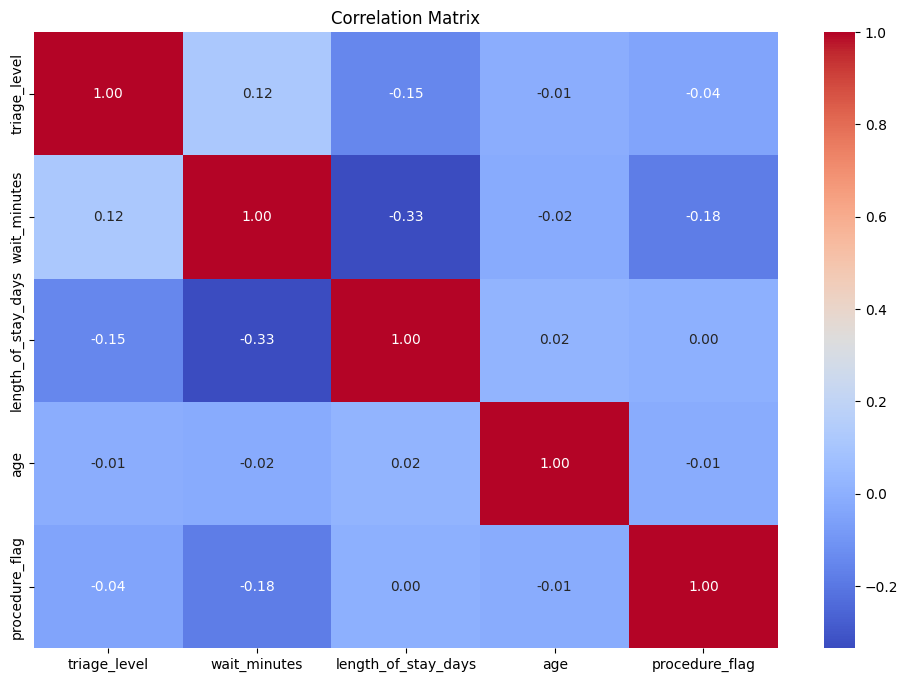

In [9]:
num_cols = admissions.select_dtypes(include='number').drop(columns=['hospital_id'])
corr = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Engineer new features from the admissions dataset that will help with the predictions.
- Avoid data leakage i.e Only use information that would be known at prediction time 

In [10]:
admissions['triage_level'] = pd.to_numeric(admissions['triage_level'], errors='coerce')
admissions['wait_per_triage'] = admissions['wait_minutes'] / admissions['triage_level']

admissions['wait_per_triage'] = admissions['wait_per_triage'].clip(lower=0, upper=admissions['wait_per_triage'].quantile(0.95))
admissions['wait_per_triage'] = admissions['wait_per_triage'].fillna(admissions['wait_per_triage'].median())

admissions['bed_impact_score'] = (
    admissions['length_of_stay_days'] * 
    (1 + admissions['procedure_flag']) *
    (6 - pd.to_numeric(admissions['triage_level'], errors='coerce'))
)


admissions.drop(columns=['triage_level', 'wait_minutes', 'length_of_stay_days', 'procedure_flag'], inplace=True)

In [12]:
admissions_agg = admissions.groupby(['date', 'hospital_id', 'ward_code']).agg({
    'wait_per_triage': 'mean',
    'age': 'mean',
    'bed_impact_score': 'mean'
}).reset_index()

categorical_cols = ['arrival_source', 'outcome', 'sex']

for col in categorical_cols:
    counts = (admissions.groupby(['date', 'hospital_id', 'ward_code', col])
              .size()
              .unstack(fill_value=0))
    counts.columns = [f'{col}_{c}' for c in counts.columns]
    admissions_agg = admissions_agg.merge(counts.reset_index(), 
                                          on=['date', 'hospital_id', 'ward_code'], 
                                          how='left')

admissions_agg.head()

,date,hospital_id,ward_code,wait_per_triage,age,bed_impact_score,arrival_source_ambulance,arrival_source_referral,arrival_source_self,arrival_source_transfer,outcome_death,outcome_discharged,outcome_readmit_30d,outcome_transferred,sex_F,sex_M
0,2022-10-28,1,ED,60.375000,56.250000,0.00,4,2,6,0,0,8,0,4,4,8
1,2022-10-28,1,ICU,27.666667,51.500000,18.75,1,0,6,1,0,8,0,0,3,5
2,2022-10-28,1,MED,33.000000,60.625000,15.75,2,1,5,0,0,8,0,0,3,5
3,2022-10-28,1,SURG,27.666667,61.000000,11.25,0,2,5,1,0,8,0,0,3,5
4,2022-10-28,2,ED,92.777778,55.333333,0.00,2,3,7,0,0,12,0,0,6,6


### Preventing Data Leakage
Why Lag Features? To predict today's admissions, we can only use information from yesterday or earlier.

Lag Strategy:

- 1-day lag: Yesterday's metrics (recent trend)
- 7-day lag: Last week's metrics (weekly pattern)

In [13]:
metrics = metrics.sort_values(['hospital_id', 'ward_code', 'date'])

lag_columns = ['occupancy', 'overflow', 'discharges', 'admission_rate_per_bed',
               'avg_wait_minutes', 'occupancy_rate']

for col in lag_columns:
    metrics[f'{col}_lag1'] = metrics.groupby(['hospital_id', 'ward_code'])[col].shift(1)
    metrics[f'{col}_lag7'] = metrics.groupby(['hospital_id', 'ward_code'])[col].shift(7)
    

metrics_safe = metrics.drop(columns=lag_columns)
metrics = metrics_safe.dropna()

### Merge and Save Data

In [15]:
main_data = pd.merge(admissions_agg, metrics, on=['date', 'hospital_id', 'ward_code'], how='inner')
main_data.to_csv(r"C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\Med_Optix\Optix_repo\Model\cleaned_df.csv", index=False)